## scaling analysis

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
from matplotlib import colors  

# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

In [126]:
# fit for viscosity

phim = [
    [0.7886717028827888, 0.7894387136954615, 0.793926329607985, 0.8324103075865033],
    [0.7886717028827888, 0.7877885526918533, 0.7939236898756902, 0.8239196866554372],
    [0.7886717028827888, 0.7885308930400247, 0.7900830006913417, 0.8044291017153138]
]

cvals = [
    [2.2961534930915994, 2.3650311285005365, 2.3581023842731605, 2.630286432009137],
    [2.2961534930915994, 2.2844228427617583, 2.2697625367992815, 2.355255703134564],
    [2.2961534930915994, 2.3000699722687648, 2.217088555299523, 2.2226341715514715]
]

# # fit for particle pressure
# phim1 = [[1.5715168229270542,
#   1.5682151816482461,
#   1.5553795002364215,
#   1.9388390284729693],
#  [1.5715168229270542,
#   1.4836455409253317,
#   1.5358291150105385,
#   1.6539741565472672],
#  [1.5715168229270542,
#   1.564849769378203,
#   1.4894275394110041,
#   1.5109527282076463]]

# cvals1 =[[8.624202080168285, 8.571864298284478, 8.36217328239919, 10.865249036885515],
#          [8.624202080168285, 7.9125522663596, 8.198785417742185, 8.697407647559611],
#          [8.624202080168285, 8.553277946417671, 7.898454068926786, 7.850309324906102]]

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,5.165,-2.090,0.999,,,5.165,-2.090,0.999,,,5.165,-2.090,0.999,,
1.4,,,5.140,-2.095,0.998,,,5.228,-2.157,0.999,,,5.241,-2.151,1.000,,
2.0,,,5.063,-2.123,1.000,,,5.103,-2.156,1.000,,,5.212,-2.189,1.000,,
4.0,,,4.440,-1.951,1.000,,,4.687,-2.149,0.997,,,5.045,-2.226,1.000,,


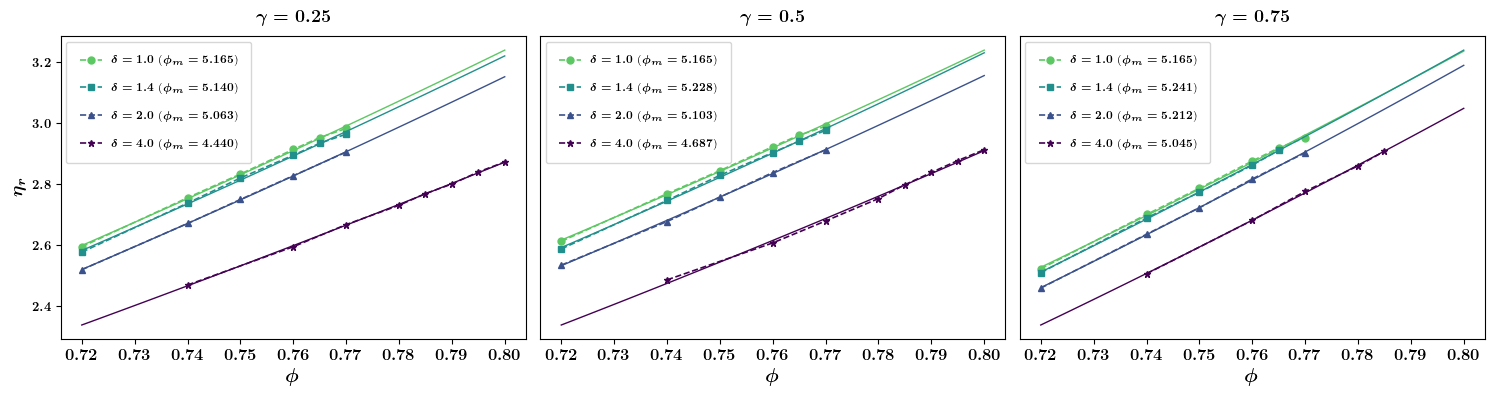

In [57]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Maron & Pierce (1956)
# def maronpierce(x,c, k):
#     return c*(1 - (x/(k))) ** -2

def maronpierce(x,c,k):
    #base = 1 - (x / k)
    #base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (x) ** -c

# def maronpierce(x, c, k):
#     base = 1 - (x / k)
#     base = np.maximum(base, 1e-10)  # Avoid negative/zero base
#     return  1 * (base ** -(c))
    
display(Math(r"\text{f_{\text{rig}}} = k \left( 1 - \frac{\phi}{\phi_m} \right)^{-c}"))
cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
#topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim1    = []
cvals1   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]

# initial guess for max phi (phim1)
# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr   = [] # r2 error
    phims  = [] # max phi calculated from fitting
    c_list = []
    for j, arj in enumerate(arr):
        visc = []
        phil = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            phi_list  = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir+"Z_Znet.txt"):
                    #print(workDir)
                    # dataFile = glob.glob(workDir+"data_*.dat")[0]
                    # data     = np.loadtxt(dataFile)
                    
                    #frigFile = workDir+"F_rig.txt"
                    #frig     = np.loadtxt(frigFile)/ npp
                    
                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
                    
                    visc_list.append(np.mean(znet[off:]) if len(znet[off:]) > off else np.nan)
                    #phil.append(phi)#/phim[i][j])
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        #phi_vals_filtered = list(sorted(set(phil)))

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered, visc_filtered, [10, -1])
        c_opt, k_opt = popt
        phims.append(k_opt)
        c_list.append(c_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], 
                   label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), 
                   color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        

        # plotting for model
        xx = np.linspace(np.min(phiv), np.max(phiv), 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim1.append(phims)
    cvals1.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    #ax[i].set_xlim(.737, .80)
    #ax[i].set_ylim(0, 1.1)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,0.002,1.558,0.997,,,0.002,1.558,0.997,,,0.002,1.558,0.997,,
1.4,,,0.002,1.406,0.993,,,0.002,1.449,0.991,,,0.001,1.537,0.994,,
2.0,,,0.006,1.039,0.986,,,0.005,1.109,0.990,,,0.003,1.229,0.997,,
4.0,,,0.013,0.850,0.989,,,0.005,1.154,0.994,,,0.003,1.290,0.987,,


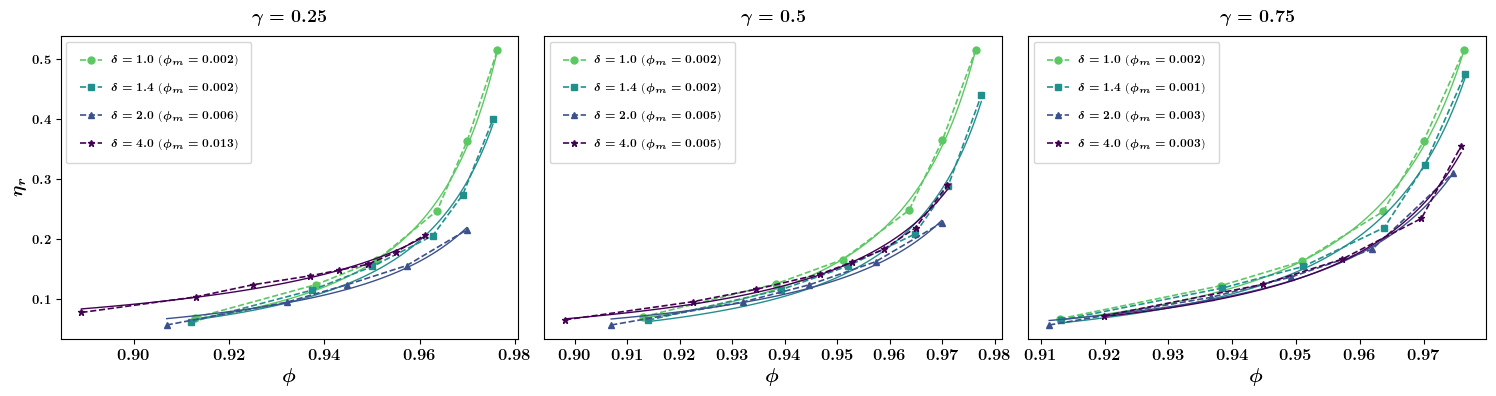

In [66]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Maron & Pierce (1956)
# def maronpierce(x,c, k):
#     return c*(1 - (x/(k))) ** -2

def maronpierce(x,c,k):
    #base = 1 - (x / k)
    #base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (1-x) ** -c

# def maronpierce(x, c, k):
#     base = 1 - (x / k)
#     base = np.maximum(base, 1e-10)  # Avoid negative/zero base
#     return  1 * (base ** -(c))
    
display(Math(r"\text{f_{\text{rig}}} = k \left( 1 - \frac{\phi}{\phi_m} \right)^{-c}"))
cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
#topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim1    = []
cvals1   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]

# initial guess for max phi (phim1)
# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr   = [] # r2 error
    phims  = [] # max phi calculated from fitting
    c_list = []
    for j, arj in enumerate(arr):
        visc = []
        phil = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            phi_list  = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    #print(workDir)
                    # dataFile = glob.glob(workDir+"data_*.dat")[0]
                    # data     = np.loadtxt(dataFile)
                    
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp
                    
                    #znetFile = workDir+"Z_Znet.txt"
                    #znet     = np.loadtxt(znetFile)[:, 2]
                    
                    visc_list.append(np.mean(frig[off:]) if len(frig[off:]) > off else np.nan)
                    #phil.append(phi)#/phim[i][j])
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y/phim[i][j] for x, y in zip(visc, phiv) if not np.isnan(x)]
        #phi_vals_filtered = list(sorted(set(phil)))

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered, visc_filtered, [0, 1])
        c_opt, k_opt = popt
        phims.append(k_opt)
        c_list.append(c_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], 
                   label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), 
                   color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        

        # plotting for model
        xx = np.linspace(np.min(phi_vals_filtered), np.max(phi_vals_filtered), 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim1.append(phims)
    cvals1.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    #ax[i].set_xlim(.737, .80)
    #ax[i].set_ylim(0, 1.1)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [68]:
np.mean(phims)

0.0023038988688110704

In [69]:
np.mean(c_list)

1.4036665930434096

In [71]:
phim1

[[0.0015104191393273546,
  0.002147755492760043,
  0.005768831875082998,
  0.012999857119839768],
 [0.0015104191393273546,
  0.0017643484088459098,
  0.004750809823340617,
  0.0047451907103783775],
 [0.0015104191393273546,
  0.0014705571820327974,
  0.0034032674942251887,
  0.002831351659658942]]

In [98]:
phim1 = [[0.0015104191393273546,
  0.002147755492760043,
  0.005768831875082998,
  0.012999857119839768],
 [0.0015104191393273546,
  0.0017643484088459098,
  0.004750809823340617,
  0.0047451907103783775],
 [0.0015104191393273546,
  0.0014705571820327974,
  0.0034032674942251887,
  0.002831351659658942]]

cvals1 = [[1.55788033616232,
  1.4055487248613596,
  1.0390851574108155,
  0.8498755402804496],
 [1.55788033616232,
  1.4494651504381013,
  1.1086938275537663,
  1.1544535206353705],
 [1.55788033616232,
  1.5374045767716007,
  1.2293849083260904,
  1.2899965509136273]]

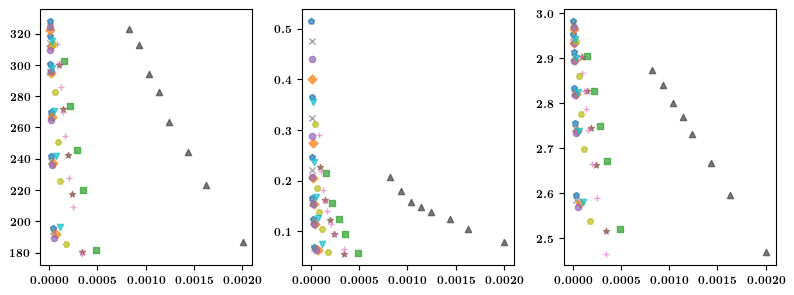

In [101]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

def power_law(x, a, b):
    return a * x**b
    
# Mac paths
#topDir = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 3 # total plots
ncols        = 3
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
paramall     = [[] for _ in range(totParams)] # required for fitting
phimall      = [[] for _ in range(totParams)]
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

fig, ax = plt.subplots(nrows, ncols, figsize=(8, 3))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    #visc_list, viscerr_list = [], []
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        phim_vals = [phim1[0][0]*(1 - (i / phim[0][0])) ** (cvals1[0][0]) if phim[0][0] != 0 
                     and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)

            frigFile = glob.glob(workDir+"F_rig.txt")[0]
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = glob.glob(workDir+"Z_Znet.txt")[0]
            znet     = np.loadtxt(znetFile)[:, 2]

            datasets = [data[off:, 8], frig[off:], znet[off:]]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    #row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
    paramall[kk].append(param_filtered)
    phimall[kk].append(phim_vals_filtered)
    
    ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=20, color=colors[pcount], alpha=0.7,  
                         label=fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$')
    
pcount += 1

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                phim_vals = [phim1[l][j+1]*(1 - (i/phim[l][j+1])) ** (cvals1[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
        
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp
        
                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
        
                    datasets = [data[off:, 8], frig[off:], znet[off:]]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                                                  
                    
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            #row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
            paramall[kk].append(param_filtered)
            phimall[kk].append(phim_vals_filtered)
            
            ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                     s=20, color=colors[pcount], alpha=0.7,  
                     label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

# for ll in range(totParams):
#     row, col  = divmod(ll, 2)
#     paramFlat = [i for sublist in paramall[ll] for i in sublist]
#     phimFlat  = [i for sublist in phimall[ll] for i in sublist]
    
#     params, covariance = curve_fit(power_law, phimFlat, paramFlat)
#     a, b = params
#     xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
#     plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
#     ax[row][col].plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)

ax[0].plot([], [], ' ', label=" ") 
#ax[0].legend(loc='upper right', fontsize=8, frameon=False, labelspacing=0.5)
fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,6.927,2.636,0.996,,,6.927,2.636,0.996,,,6.927,2.636,0.996,,
1.4,,,6.853,2.631,0.995,,,6.137,2.708,0.996,,,6.845,2.636,0.997,,
2.0,,,6.598,2.606,0.999,,,6.428,2.618,0.999,,,6.125,2.680,0.999,,
4.0,,,11.131,2.098,0.997,,,8.854,2.220,0.997,,,7.087,2.471,0.998,,


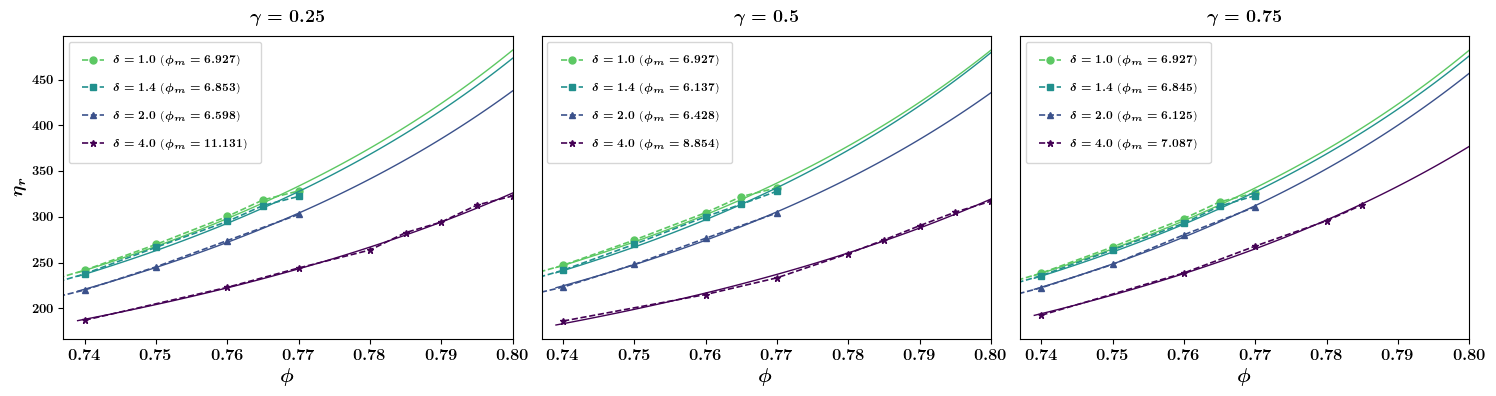

In [40]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Maron & Pierce (1956)
# def maronpierce(x,c, k):
#     return c*(1 - (x/(k))) ** -2

def maronpierce(x,c,k):
    #base = 1 - (x / k)
    #base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    #return k * ((x) ** -c)
    return k * ((1- x) ** -c)
    
# def maronpierce(x,c,k):
#     base = 1 - (x / k)
#     base = np.maximum(base, 1e-10)  # Prevent negative or zero base
#     return 1 * (base ** -c)

display(Math(r"\eta_r = \left( 1 - \frac{\phi}{\phi_m} \right)^{-c}"))
cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
#topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim1    = []
cvals1   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim1)
# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 8])) if len(data[off:, 8]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim1.append(phims)
    cvals1.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    #ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,1.572,8.624,0.997,,,1.572,8.624,0.997,,,1.572,8.624,0.997,,
1.4,,,1.568,8.572,0.997,,,1.484,7.913,0.998,,,1.565,8.553,0.998,,
2.0,,,1.555,8.362,0.999,,,1.536,8.199,0.999,,,1.489,7.898,0.999,,
4.0,,,1.939,10.865,0.997,,,1.654,8.697,0.995,,,1.511,7.850,0.999,,


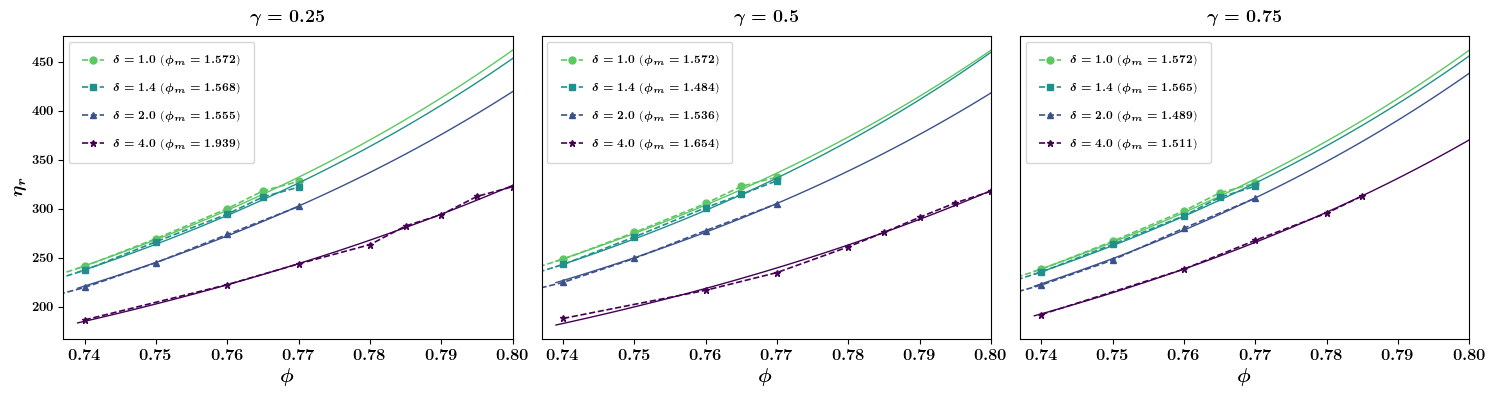

In [103]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Maron & Pierce (1956)
# def maronpierce(x,c, k):
#     return c*(1 - (x/(k))) ** -2

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

display(Math(r"frig = \left( 1 - \frac{\phi}{\phi_m} \right)^{-c}"))
cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
#topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim1    = []
cvals1   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim1)
# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 8])) if len(data[off:, 8]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim1.append(phims)
    cvals1.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    #ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [125]:
phim1 =[[1.5715168229270542,
  1.5682151816482461,
  1.5553795002364215,
  1.9388390284729693],
 [1.5715168229270542,
  1.4836455409253317,
  1.5358291150105385,
  1.6539741565472672],
 [1.5715168229270542,
  1.564849769378203,
  1.4894275394110041,
  1.5109527282076463]]

cvals1 = [[8.624202080168285, 8.571864298284478, 8.36217328239919, 10.865249036885515],
 [8.624202080168285, 7.9125522663596, 8.198785417742185, 8.697407647559611],
 [8.624202080168285, 8.553277946417671, 7.898454068926786, 7.850309324906102]]

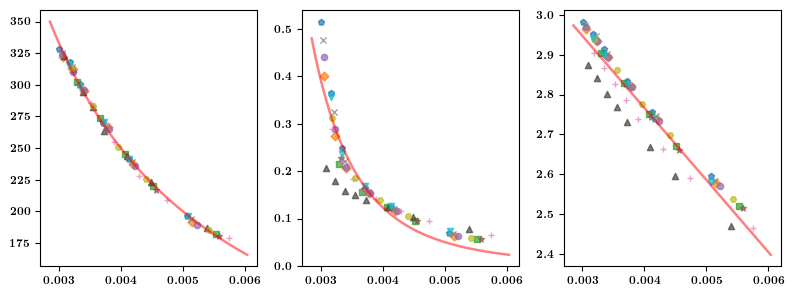

In [104]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

def power_law(x, a, b):
    return a * x**b

def linear_func(x, m, b):
    return m * x + b 
    
# Mac paths
#topDir = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 3 # total plots
ncols        = 3
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
paramall     = [[] for _ in range(totParams)] # required for fitting
phimall      = [[] for _ in range(totParams)]
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

fig, ax = plt.subplots(nrows, ncols, figsize=(8, 3))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    #visc_list, viscerr_list = [], []
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim1[0][0])) ** (cvals1[0][0]) if phim1[0][0] != 0 
                     and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)

            frigFile = glob.glob(workDir+"F_rig.txt")[0]
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = glob.glob(workDir+"Z_Znet.txt")[0]
            znet     = np.loadtxt(znetFile)[:, 2]

            datasets = [data[off:, 8], frig[off:], znet[off:]]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    #row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
    paramall[kk].append(param_filtered)
    phimall[kk].append(phim_vals_filtered)
    
    ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=20, color=colors[pcount], alpha=0.7,  
                         label=fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$')
    
pcount += 1

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim1[l][j+1])) ** (cvals1[l][j+1]) if phim1[l][j+1] != 0 and 
                             (1 - (i / phim1[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
        
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp
        
                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
        
                    datasets = [data[off:, 8], frig[off:], znet[off:]]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                                                  
                    
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            #row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
            paramall[kk].append(param_filtered)
            phimall[kk].append(phim_vals_filtered)
            
            ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                     s=20, color=colors[pcount], alpha=0.7,  
                     label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

for ll in range(totParams-1):
    #row, col  = divmod(ll, 2)
    paramFlat = [i for sublist in paramall[ll] for i in sublist]
    phimFlat  = [i for sublist in phimall[ll] for i in sublist]
    
    params, covariance = curve_fit(power_law, phimFlat, paramFlat)
    a, b = params
    xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
    #plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
    ax[ll].plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)


paramFlat = [i for sublist in paramall[-1] for i in sublist]
phimFlat  = [i for sublist in phimall[-1] for i in sublist]
params, covariance = curve_fit(linear_func, phimFlat, paramFlat)
a, b = params
xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
#plt.plot(xlin, linear_func(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
ax[-1].plot(xlin, linear_func(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)

ax[0].plot([], [], ' ', label=" ") 
#ax[0].legend(loc='upper right', fontsize=8, frameon=False, labelspacing=0.5)
fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

In [96]:
np.mean(phim1)

1.5846385857182324

In [97]:
np.mean(cvals1)

8.565223294165499

In [159]:
phima = np.array([i for sublist in phim1 for i in sublist])
phimb = np.array([i*1.986 for sublist in phim for i in sublist])

np.mean(phima - phimb)

0.0007265646318123468

In [161]:
phima - phimb

array([ 0.00521482,  0.0003899 , -0.02135819,  0.28567216,  0.00521482,
       -0.08090252, -0.04090333,  0.01766966,  0.00521482, -0.00117258,
       -0.0796773 , -0.08664347])

In [151]:
cvalsa = np.array([i*3.685 for sublist in cvals for i in sublist])
cvalsb = np.array([i for sublist in cvals1 for i in sublist])

np.mean(cvalsa - cvalsb)

-0.0003269734453337225

In [160]:
cvalsa - cvalsb

array([-0.16287646,  0.14327541,  0.327434  , -1.17264353, -0.16287646,
        0.50554591,  0.16528953, -0.01829038, -0.16287646, -0.0775201 ,
        0.27151726,  0.3400976 ])

In [134]:
cvals

[[2.2961534930915994,
  2.3650311285005365,
  2.3581023842731605,
  2.630286432009137],
 [2.2961534930915994,
  2.2844228427617583,
  2.2697625367992815,
  2.355255703134564],
 [2.2961534930915994,
  2.3000699722687648,
  2.217088555299523,
  2.2226341715514715]]

In [127]:
cvals1

[[8.624202080168285, 8.571864298284478, 8.36217328239919, 10.865249036885515],
 [8.624202080168285, 7.9125522663596, 8.198785417742185, 8.697407647559611],
 [8.624202080168285, 8.553277946417671, 7.898454068926786, 7.850309324906102]]

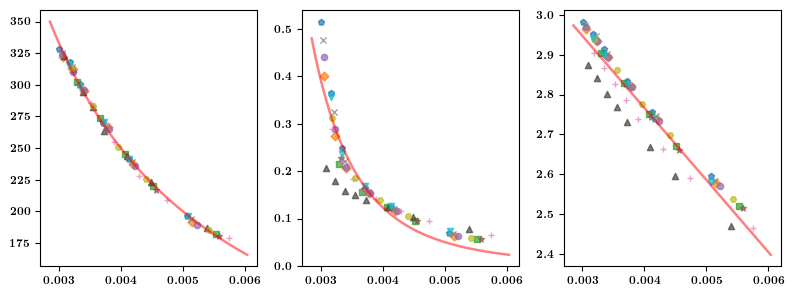

In [165]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

def power_law(x, a, b):
    return a * x**b

def linear_func(x, m, b):
    return m * x + b 
    
# Mac paths
#topDir = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 3 # total plots
ncols        = 3
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
paramall     = [[] for _ in range(totParams)] # required for fitting
phimall      = [[] for _ in range(totParams)]
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

fig, ax = plt.subplots(nrows, ncols, figsize=(8, 3))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    #visc_list, viscerr_list = [], []
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        phim_vals = [(1 - (i / 1/phim1[0][0])) ** (cvals1[0][0]) if phim1[0][0] != 0 
                     and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)

            frigFile = glob.glob(workDir+"F_rig.txt")[0]
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = glob.glob(workDir+"Z_Znet.txt")[0]
            znet     = np.loadtxt(znetFile)[:, 2]

            datasets = [data[off:, 8], frig[off:], znet[off:]]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    #row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
    paramall[kk].append(param_filtered)
    phimall[kk].append(phim_vals_filtered)
    
    ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=20, color=colors[pcount], alpha=0.7,  
                         label=fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$')
    
pcount += 1

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                phim_vals = [(1 - (i/1/phim1[l][j+1])) ** (cvals1[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
        
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp
        
                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
        
                    datasets = [data[off:, 8], frig[off:], znet[off:]]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                                                  
                    
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            #row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
            paramall[kk].append(param_filtered)
            phimall[kk].append(phim_vals_filtered)
            
            ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                     s=20, color=colors[pcount], alpha=0.7,  
                     label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

for ll in range(totParams-1):
    #row, col  = divmod(ll, 2)
    paramFlat = [i for sublist in paramall[ll] for i in sublist]
    phimFlat  = [i for sublist in phimall[ll] for i in sublist]
    
    params, covariance = curve_fit(power_law, phimFlat, paramFlat)
    a, b = params
    xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
    #plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
    ax[ll].plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)


paramFlat = [i for sublist in paramall[-1] for i in sublist]
phimFlat  = [i for sublist in phimall[-1] for i in sublist]
params, covariance = curve_fit(linear_func, phimFlat, paramFlat)
a, b = params
xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
#plt.plot(xlin, linear_func(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
ax[-1].plot(xlin, linear_func(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)

ax[0].plot([], [], ' ', label=" ") 
#ax[0].legend(loc='upper right', fontsize=8, frameon=False, labelspacing=0.5)
fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()